In [86]:
import  warnings
warnings.filterwarnings("ignore")

In [87]:
import os
for dirname, _, filenames in os.walk("../input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/importance_4.csv
../input/importance_3.csv
../input/importance_2.csv
../input/bf_train.csv
../input/importance_0.csv
../input/importance_1.csv
../input/structures.csv
../input/test.csv
../input/train_folds.csv
../input/train.csv
../input/bf_test.csv
../input/sample_submission.csv


In [88]:
import pandas as pd

DIR = "../input"

train = pd.read_csv(os.path.join(DIR, "train.csv"))
test = pd.read_csv(os.path.join(DIR, "test.csv"))
sb = pd.read_csv(os.path.join(DIR, "sample_submission.csv"))
structures = pd.read_csv(os.path.join(DIR, "structures.csv"))

In [89]:
print(train.shape)
train.head(3)

(4659076, 6)


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548


In [90]:
print(test.shape)
test.head(3)

(2505190, 5)


,id,molecule_name,atom_index_0,atom_index_1,type
0,4659076,dsgdb9nsd_000004,2,0,2JHC
1,4659077,dsgdb9nsd_000004,2,1,1JHC
2,4659078,dsgdb9nsd_000004,2,3,3JHH


In [91]:
sb.head(3)

,id,scalar_coupling_constant
0,4659076,0
1,4659077,0
2,4659078,0


In [92]:
structures.head(3)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277


In [93]:
print(train["molecule_name"].nunique())
print(test["molecule_name"].nunique())
print(structures["atom"].nunique())
print(train["type"].nunique())
print(test["type"].nunique())

85012
45777
5
8
8


In [94]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076e+06,4.659076e+06,4.659076e+06,4.659076e+06
mean,2.329538e+06,1.335677e+01,5.881245e+00,1.591591e+01
std,1.344960e+06,3.269432e+00,4.993794e+00,3.493466e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-4.476050e+01
25%,1.164769e+06,1.100000e+01,2.000000e+00,-2.551463e-01
50%,2.329538e+06,1.300000e+01,5.000000e+00,2.280350e+00
75%,3.494306e+06,1.600000e+01,8.000000e+00,7.389100e+00
max,4.659075e+06,2.800000e+01,2.800000e+01,2.077090e+02


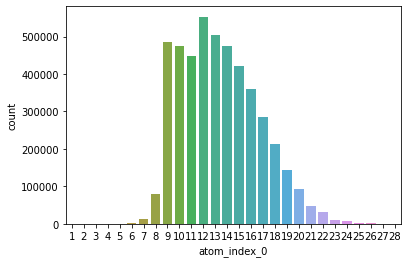

In [95]:
import seaborn as sns
sns.countplot(train["atom_index_0"]);

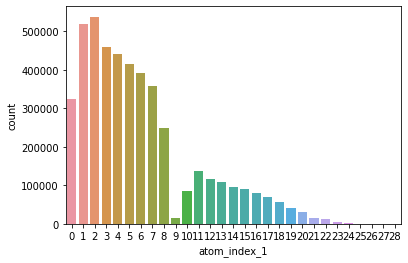

In [96]:
sns.countplot(train["atom_index_1"]);

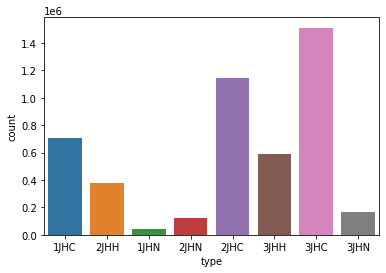

In [97]:
sns.countplot(train["type"]);

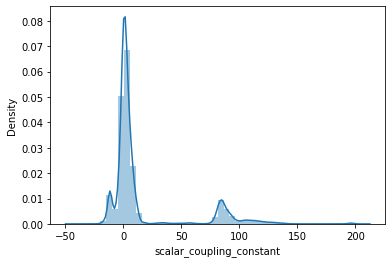

In [98]:
sns.distplot(train["scalar_coupling_constant"]);

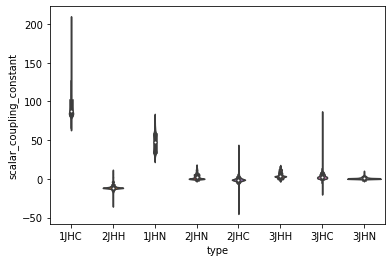

In [99]:
sns.violinplot(
    data=train,
    x="type",
    y="scalar_coupling_constant",
);

In [100]:
join_atom0_to_train = pd.merge(
    train,
    structures,
    left_on=["molecule_name", "atom_index_0"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)

join_atom0_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_index,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,0.00215,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1,H,0.00215,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1,H,0.00215,-0.006031,0.001976


In [101]:
join_atom0_to_train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
atom_index                  0
atom                        0
x                           0
y                           0
z                           0
dtype: int64

In [102]:
join_atom0_to_train = join_atom0_to_train.drop(
    ["atom_index"], 
    axis=1,
)
join_atom0_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976


In [103]:
join_atom0_to_train = join_atom0_to_train.rename(
    columns={
        "atom": "atom_0",
        "x": "x_0",
        "y": "y_0",
        "z": "z_0",
    }
)
join_atom0_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976


In [104]:
join_allatom_to_train = pd.merge(
    join_atom0_to_train,
    structures,
    left_on=["molecule_name", "atom_index_1"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)

join_allatom_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_index,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,3,H,-0.540815,1.447527,-0.876644


In [105]:
join_allatom_to_train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
atom_0                      0
x_0                         0
y_0                         0
z_0                         0
atom_index                  0
atom                        0
x                           0
y                           0
z                           0
dtype: int64

In [106]:
join_allatom_to_train = join_allatom_to_train.drop(
    ["atom_index"], 
    axis=1,
)
join_allatom_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644


In [107]:
join_allatom_to_train = join_allatom_to_train.rename(
    columns={
        "atom": "atom_1",
        "x": "x_1",
        "y": "y_1",
        "z": "z_1",
    }
)
join_allatom_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644


In [108]:
train_all = join_allatom_to_train

In [109]:
join_atom0_to_test = pd.merge(
    test,
    structures,
    left_on=["molecule_name", "atom_index_0"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)
join_atom0_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_index,atom,x,y,z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,2,H,-1.661639,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,2,H,-1.661639,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,2,H,-1.661639,0.0,1.0


In [110]:
join_atom0_to_test = join_atom0_to_test.drop(
    ["atom_index"], 
    axis=1,
)
join_atom0_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom,x,y,z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0


In [111]:
join_atom0_to_test = join_atom0_to_test.rename(
    columns={
        "atom": "atom_0",
        "x": "x_0",
        "y": "y_0",
        "z": "z_0",
    }
)
join_atom0_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0


In [112]:
join_allatom_to_test = pd.merge(
    join_atom0_to_test,
    structures,
    left_on=["molecule_name", "atom_index_1"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)
join_allatom_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_index,atom,x,y,z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,0,C,0.599539,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,1,C,-0.599539,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,3,H,1.661639,0.0,1.0


In [113]:
join_allatom_to_test = join_allatom_to_test.drop(
    ["atom_index"], 
    axis=1,
)
join_allatom_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom,x,y,z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0


In [114]:
join_allatom_to_test = join_allatom_to_test.rename(
    columns={
        "atom": "atom_1",
        "x": "x_1",
        "y": "y_1",
        "z": "z_1",
    }
)
join_allatom_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0


In [115]:
test_all = join_allatom_to_test

In [116]:
import numpy as np

train_0 = train_all[["x_0", "y_0", "z_0"]].values
train_1 = train_all[["x_1", "y_1", "z_1"]].values
test_0 = test_all[["x_0", "y_0", "z_0"]].values
test_1 = test_all[["x_1", "y_1", "z_1"]].values

train_all["dist"] = np.linalg.norm(train_0 - train_1, axis=1)
test_all["dist"] = np.linalg.norm(test_0 - test_1, axis=1)

In [117]:
train_all["dist_x"] = np.square(train_all["x_0"] - train_all["x_1"])
train_all["dist_y"] = np.square(train_all["y_0"] - train_all["y_1"])
train_all["dist_z"] = np.square(train_all["z_0"] - train_all["z_1"])
test_all["dist_x"] = np.square(test_all["x_0"] - test_all["x_1"])
test_all["dist_y"] = np.square(test_all["y_0"] - test_all["y_1"])
test_all["dist_z"] = np.square(test_all["z_0"] - test_all["z_1"])

In [118]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973


In [119]:
test_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0,2.261178,5.112926,0.0,0.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0,1.062099,1.128054,0.0,0.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0,3.323277,11.044171,0.0,0.0


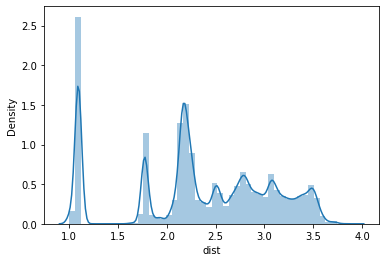

In [120]:
sns.distplot(train_all["dist"]);

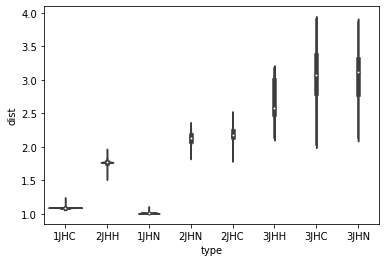

In [121]:
sns.violinplot(
    data=train_all,
    x="type",
    y="dist",
);

In [122]:
train_all["type"]

0          1JHC
1          2JHH
2          2JHH
3          2JHH
4          1JHC
           ... 
4659071    2JHC
4659072    3JHC
4659073    3JHC
4659074    2JHC
4659075    1JHC
Name: type, Length: 4659076, dtype: object

In [123]:
train_all["type_0"] = train_all["type"].apply(lambda x: x[0])
train_all["type_1"] = train_all["type"].apply(lambda x: x[1:])
test_all["type_0"] = test_all["type"].apply(lambda x: x[0])
test_all["type_1"] = test_all["type"].apply(lambda x: x[1:])

In [124]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z,type_0,type_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036,1,JHC
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003,2,JHH
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973,2,JHH


In [125]:
test_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z,type_0,type_1
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0,2.261178,5.112926,0.0,0.0,2,JHC
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0,1.062099,1.128054,0.0,0.0,1,JHC
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0,3.323277,11.044171,0.0,0.0,3,JHH


In [130]:
train_all["dist_type_mean"] = train_all["dist"] / train_all.groupby("type")["dist"].transform("mean")
train_all["dist_type0_mean"] = train_all["dist"] / train_all.groupby("type_0")["dist"].transform("mean")
train_all["dist_type1_mean"] = train_all["dist"] / train_all.groupby("type_1")["dist"].transform("mean")
test_all["dist_type_mean"] = test_all["dist"] / test_all.groupby("type")["dist"].transform("mean")
test_all["dist_type0_mean"] = test_all["dist"] / test_all.groupby("type_0")["dist"].transform("mean")
test_all["dist_type1_mean"] = test_all["dist"] / test_all.groupby("type_1")["dist"].transform("mean")

In [131]:
train_all["dist_molecule_type_mean"] = train_all.groupby(["molecule_name", "type"])["dist"].transform("mean")
test_all["dist_molecule_type_mean"] = test_all.groupby(["molecule_name", "type"])["dist"].transform("mean")

In [132]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_type_mean,dist_type0_mean,dist_type1_mean,dist_molecule_type_mean
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,...,1.091953,0.000220,1.192105,0.000036,1,JHC,0.999134,1.003399,0.462988,1.091950
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,...,1.783120,1.019253,2.160261,0.000003,2,JHH,1.004647,0.852964,0.762007,1.783146
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,...,1.783147,0.294812,2.112831,0.771973,2,JHH,1.004663,0.852977,0.762019,1.783146


In [133]:
test_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_type_mean,dist_type0_mean,dist_type1_mean,dist_molecule_type_mean
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,...,2.261178,5.112926,0.0,0.0,2,JHC,1.032513,1.081806,0.958989,2.261178
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,...,1.062099,1.128054,0.0,0.0,1,JHC,0.971802,0.976024,0.450447,1.062099
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,...,3.323277,11.044171,0.0,0.0,3,JHH,1.230092,1.115834,1.420208,3.323277


In [135]:
from sklearn import preprocessing

features = ["atom_0", "atom_1", "type", "type_0", "type_1"]
for feat in features:
    lbl_enc = preprocessing.LabelEncoder()
    lbl_enc.fit(list(train_all[feat].values) + list(test_all[feat].values))
    train_all[feat] = lbl_enc.fit_transform(train_all[feat].values)
    test_all[feat] = lbl_enc.fit_transform(test_all[feat].values)

In [138]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_type_mean,dist_type0_mean,dist_type1_mean,dist_molecule_type_mean
0,0,dsgdb9nsd_000001,1,0,0,84.8076,0,0.00215,-0.006031,0.001976,...,1.091953,0.000220,1.192105,0.000036,0,0,0.999134,1.003399,0.462988,1.091950
1,1,dsgdb9nsd_000001,1,2,3,-11.2570,0,0.00215,-0.006031,0.001976,...,1.783120,1.019253,2.160261,0.000003,1,1,1.004647,0.852964,0.762007,1.783146
2,2,dsgdb9nsd_000001,1,3,3,-11.2548,0,0.00215,-0.006031,0.001976,...,1.783147,0.294812,2.112831,0.771973,1,1,1.004663,0.852977,0.762019,1.783146


In [139]:
test_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_type_mean,dist_type0_mean,dist_type1_mean,dist_molecule_type_mean
0,4659076,dsgdb9nsd_000004,2,0,2,0,-1.661639,0.0,1.0,0,...,2.261178,5.112926,0.0,0.0,1,0,1.032513,1.081806,0.958989,2.261178
1,4659077,dsgdb9nsd_000004,2,1,0,0,-1.661639,0.0,1.0,0,...,1.062099,1.128054,0.0,0.0,0,0,0.971802,0.976024,0.450447,1.062099
2,4659078,dsgdb9nsd_000004,2,3,6,0,-1.661639,0.0,1.0,1,...,3.323277,11.044171,0.0,0.0,2,1,1.230092,1.115834,1.420208,3.323277
